## Exploratory Data Analysis

In this notebook, we will be exploring data and making necessary analyses to gain insights. <br>
<br>
The data will be using will be the cleansed one from our data cleaning notebook.

In [17]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# Import data
df = pd.read_csv('../data/MentalHealthSurvey_Cleaned.csv')

#### 1. Which course has the highest level of mental health issues?

In [19]:
# Reshaping the data to long format
# Necessary for bar charts
df_melted = df.melt(id_vars=['degree_major'], 
                    value_vars=['depression', 'anxiety', 'isolation'],
                    var_name='mental_health_factor',
                    value_name='rating')

# Normalizing the rating values 
df_melted['normalized_rating'] = df_melted.groupby('degree_major')['rating'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

print(df_melted.head())

       degree_major mental_health_factor  rating  normalized_rating
0      Data Science           depression       2               0.25
1  Computer Science           depression       2               0.25
2  Computer Science           depression       5               1.00
3  Computer Science           depression       5               1.00
4  Computer Science           depression       5               1.00


I normalized the values for the ratings of the mental health values to ensure that they are scaled similarly. Based on initial exploration, there are different sample sizes for the majors so normalizing will allow a better comparison across the degrees.

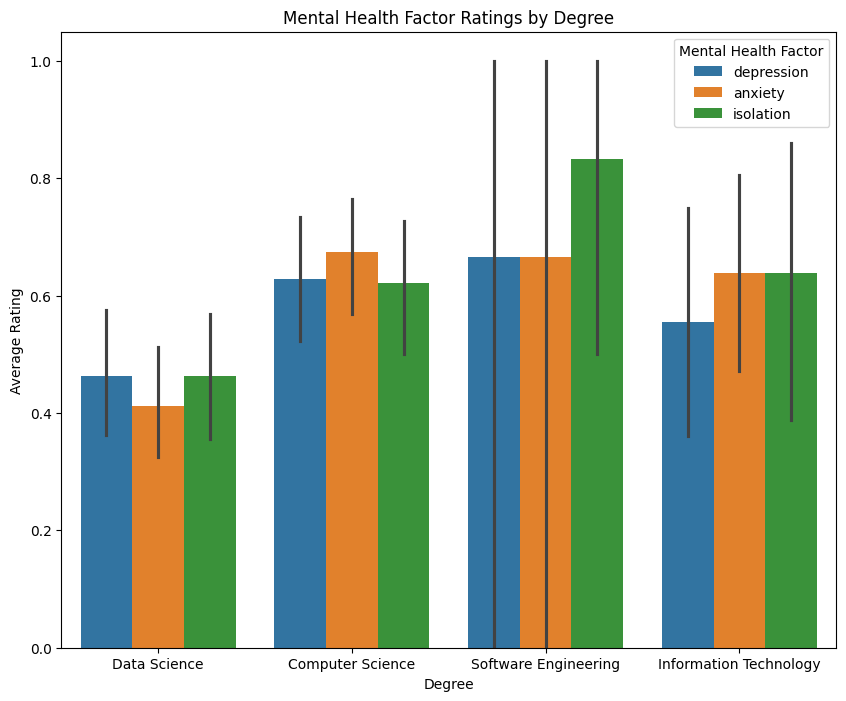

In [20]:
# Creating a grouped bar chart
plt.figure(figsize=(10,8))

sns.barplot(x='degree_major', y='normalized_rating', hue='mental_health_factor', data=df_melted)

plt.title('Mental Health Factor Ratings by Degree')
plt.xlabel('Degree')
plt.ylabel('Average Rating')
plt.legend(title='Mental Health Factor')
plt.show()

Based on the chart, Software Engineering major has the highest average ratings for the 3 different mental health factors while Data Science major has the lowest average ratings.